In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

In [6]:
train_data_file = "C:/Users/Stille/Desktop/ML projects/zhengqi_train.txt"
test_data_file =  "C:/Users/Stille/Desktop/ML projects/zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep = '\t', encoding = 'utf-8')
test_data = pd.read_csv(test_data_file, sep = '\t', encoding = 'utf-8')

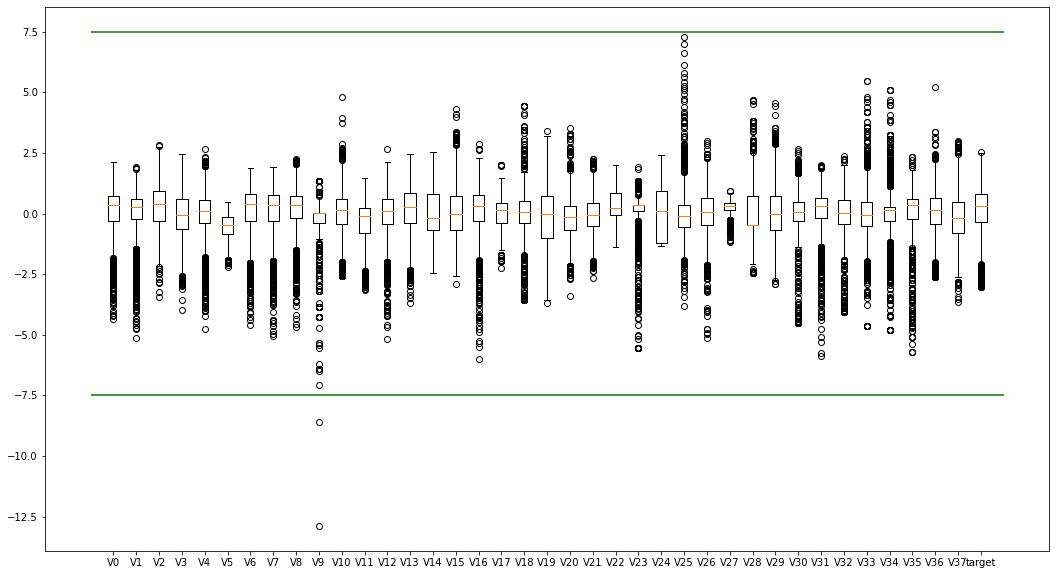

In [7]:
plt.figure(figsize = (18, 10))
plt.boxplot(x = train_data.values,labels = train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors = 'g')
plt.show()

In [8]:
train_data = train_data[train_data['V9'] > -7.5]

In [9]:
# minMax scale
from sklearn import preprocessing 

features_columns = [col for col in train_data.columns if col not in ['target']]
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

train_data_scaler['target'] = train_data['target']

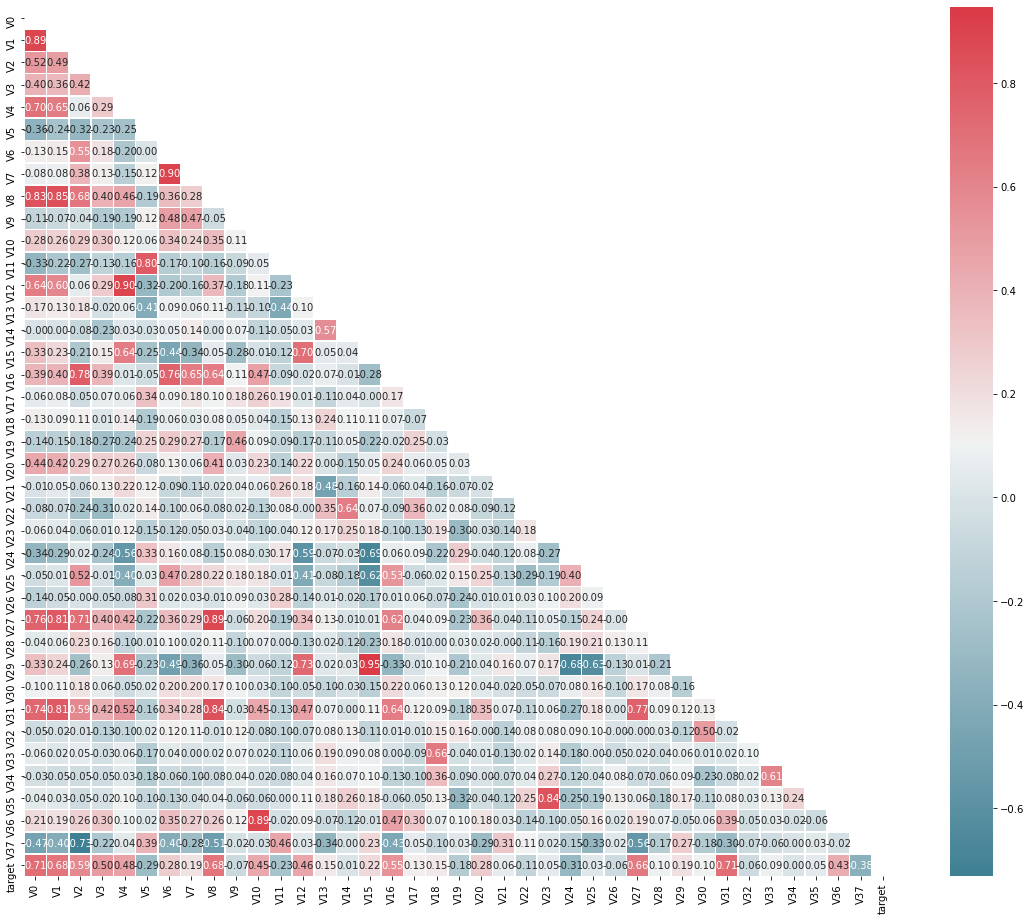

In [10]:
plt.figure(figsize = (20, 16))
column = train_data_scaler.columns.tolist()
mcorr = train_data_scaler[column].corr(method = "spearman")
mask = np.zeros_like(mcorr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap = True)
g = sns.heatmap(mcorr, mask = mask, cmap = cmap, square = True, linewidths = .5, annot = True, fmt = '0.2f')
plt.show()

In [11]:
# correlation analysis
mcorr = mcorr.abs()
numerical_corr = mcorr[mcorr['target'] > 0.1]['target']
print(numerical_corr.sort_values(ascending = False))

index0 = numerical_corr.sort_values(ascending = False).index
print(train_data_scaler[index0].corr('spearman'))

target    1.000000
V0        0.712403
V31       0.711636
V1        0.682909
V8        0.679469
V27       0.657398
V2        0.585850
V16       0.545793
V3        0.501622
V4        0.478683
V12       0.460300
V10       0.448682
V36       0.425991
V37       0.376443
V24       0.305526
V5        0.286076
V6        0.280195
V20       0.278381
V11       0.234551
V15       0.221290
V29       0.190109
V7        0.185321
V19       0.180111
V18       0.149741
V13       0.149199
V17       0.126262
V22       0.112743
V30       0.101378
Name: target, dtype: float64
          target        V0       V31        V1        V8       V27        V2  \
target  1.000000  0.712403  0.711636  0.682909  0.679469  0.657398  0.585850   
V0      0.712403  1.000000  0.739116  0.894116  0.832151  0.763128  0.516817   
V31     0.711636  0.739116  1.000000  0.807585  0.841469  0.765750  0.589890   
V1      0.682909  0.894116  0.807585  1.000000  0.849034  0.807102  0.490239   
V8      0.679469  0.832151  0.841469  0

In [12]:
# filter the features that have correlation coefficient larger than the threshold 0.3
features_corr = numerical_corr.sort_values(ascending = False).reset_index()
features_corr.columns = ['features_and_target', 'corr']
features_corr_select = features_corr[features_corr['corr'] > 0.3]
print(features_corr_select)
select_features = [col for col in features_corr_select['features_and_target'] if col not in ['target']]
new_train_data_corr_select = train_data_scaler[select_features + ['target']]
new_test_data_corr_select = test_data_scaler[select_features]

   features_and_target      corr
0               target  1.000000
1                   V0  0.712403
2                  V31  0.711636
3                   V1  0.682909
4                   V8  0.679469
5                  V27  0.657398
6                   V2  0.585850
7                  V16  0.545793
8                   V3  0.501622
9                   V4  0.478683
10                 V12  0.460300
11                 V10  0.448682
12                 V36  0.425991
13                 V37  0.376443
14                 V24  0.305526


In [13]:
# Multicollinearity analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

new_numerical=['V0', 'V2', 'V3', 'V4', 'V5', 'V6', 'V10','V11', 
               'V13', 'V15', 'V16', 'V18', 'V19', 'V20', 'V22','V24','V30', 'V31', 'V37']
X = np.matrix(train_data_scaler[new_numerical])
VIF_list = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
VIF_list

[216.73387180903222,
 114.38118723828812,
 27.863778129686356,
 201.96436579080174,
 78.93722825798903,
 151.06983667656212,
 14.519604941508451,
 82.69750284665385,
 28.479378440614585,
 27.759176471505945,
 526.6483470743831,
 23.50166642638334,
 19.920315849901424,
 24.640481765008683,
 11.816055964845381,
 4.958208708452915,
 37.09877416736591,
 298.26442986612767,
 47.854002539887034]

In [14]:
# Dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.9)
new_train_pca_90 = pca.fit_transform(train_data_scaler.iloc[:, 0:-1])
new_test_pca_90 = pca.transform(test_data_scaler)
new_train_pca_90 = pd.DataFrame(new_train_pca_90)
new_test_pca_90 = pd.DataFrame(new_test_pca_90)
new_train_pca_90['target'] = train_data_scaler['target']

In [16]:
# keep 21 components
pca = PCA(n_components = 0.95)
new_train_pca_21 = pca.fit_transform(train_data_scaler.iloc[:, 0:-1])
new_test_pca_21 = pca.transform(test_data_scaler)
new_train_pca_21 = pd.DataFrame(new_train_pca_21)
new_test_pca_21 = pd.DataFrame(new_test_pca_21)
new_train_pca_21['target'] = train_data_scaler['target']
new_train_pca_21.describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,target
count,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,...,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2884.000000
mean,1.636627e-17,-1.324689e-16,1.409899e-17,1.479143e-17,6.216633e-17,-7.522665e-17,-1.170908e-17,4.280668e-17,-4.976961e-17,9.952480e-17,...,-8.429578e-18,-3.471851e-17,-1.436587e-19,1.190263e-16,2.878463e-17,3.648810e-17,6.994193e-18,3.868566e-17,-1.306224e-16,0.127274
std,3.998976e-01,3.500240e-01,2.938631e-01,2.728023e-01,2.077128e-01,1.951842e-01,1.877104e-01,1.607670e-01,1.512707e-01,1.443772e-01,...,1.193301e-01,1.149758e-01,1.133507e-01,1.019259e-01,9.617307e-02,9.205940e-02,8.423171e-02,8.295263e-02,7.696785e-02,0.983462
min,-1.071795e+00,-9.429479e-01,-9.948314e-01,-7.103087e-01,-7.703987e-01,-5.340294e-01,-5.993766e-01,-5.870755e-01,-6.282818e-01,-4.902583e-01,...,-4.175153e-01,-4.310613e-01,-4.170535e-01,-3.601627e-01,-3.432530e-01,-3.530609e-01,-3.908328e-01,-3.089560e-01,-2.867812e-01,-3.044000
25%,-2.804085e-01,-2.613727e-01,-2.090797e-01,-1.945196e-01,-1.315620e-01,-1.264097e-01,-1.236360e-01,-1.016452e-01,-9.662098e-02,-9.297088e-02,...,-7.139961e-02,-7.474073e-02,-7.709743e-02,-6.603914e-02,-6.064846e-02,-6.247177e-02,-5.357475e-02,-5.279870e-02,-4.930849e-02,-0.348500
50%,-1.417104e-02,-1.277241e-02,2.112166e-02,-2.337401e-02,-5.122797e-03,-1.355336e-02,-1.747870e-04,-4.656359e-03,2.572054e-03,-1.479172e-03,...,-4.140670e-03,1.054915e-03,-1.758387e-03,-7.533392e-04,-4.559279e-03,-2.317781e-03,-3.034317e-04,3.391130e-03,-1.703944e-03,0.313000
75%,2.287306e-01,2.317720e-01,2.069571e-01,1.657590e-01,1.281660e-01,9.993122e-02,1.272081e-01,9.657222e-02,1.002626e-01,9.059634e-02,...,6.786199e-02,7.574868e-02,7.116829e-02,6.357449e-02,5.732624e-02,6.139602e-02,5.068802e-02,5.084688e-02,4.693391e-02,0.794250
max,1.597730e+00,1.382802e+00,1.010250e+00,1.448007e+00,1.034061e+00,1.358962e+00,6.191589e-01,7.370089e-01,6.449125e-01,5.839586e-01,...,5.156118e-01,4.978126e-01,4.673189e-01,4.570870e-01,5.153325e-01,3.556862e-01,4.709891e-01,3.677911e-01,3.663361e-01,2.538000


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [19]:
# apply pca to keep 21 components
new_train_pca_21 = new_train_pca_21.fillna(0)
train = new_train_pca_21[new_test_pca_21.columns]
target = new_train_pca_21['target']

# split the data
train_data, test_data, train_target, test_target = \
train_test_split(train, target, test_size = 0.2, random_state = 0)

In [20]:
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    print(train_scores_mean)
    print(test_scores_mean)
    
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1, color = "b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "b",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "r",
             label = "Cross-validation score")
 
    plt.legend(loc = "best")
    return plt

In [23]:
# Linear regression
clf = LinearRegression()
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("LinearRegression:   ", score)

LinearRegression:    0.2642337917628173


[0.70183463 0.66761103 0.66101945 0.65732898 0.65360375]
[0.57364886 0.61882339 0.62809368 0.63012866 0.63158596]


<module 'matplotlib.pyplot' from 'C:\\Users\\Stille\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

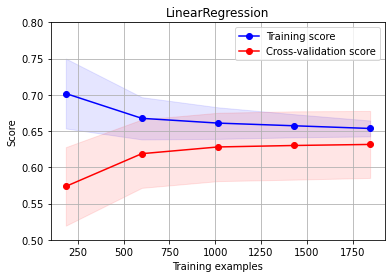

In [24]:
X = train_data.values
y = train_target.values
 
title = r"LinearRegression"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 0)
estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, ylim = (0.5, 0.8), cv = cv, n_jobs = 1)

In [25]:
# KNN
clf = KNeighborsRegressor(n_neighbors = 8)
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("KNeighborsRegressor:   ", score)

KNeighborsRegressor:    0.2635369464478806


[0.61581146 0.68763995 0.71414969 0.73084172 0.73976273]
[0.50369207 0.58753672 0.61969929 0.64062459 0.6560054 ]


<module 'matplotlib.pyplot' from 'C:\\Users\\Stille\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

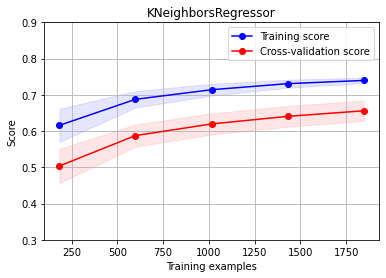

In [26]:
X = train_data.values
y = train_target.values
 
title = r"KNeighborsRegressor"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 0)

estimator = KNeighborsRegressor(n_neighbors = 8)
plot_learning_curve(estimator, title, X, y, ylim = (0.3, 0.9), cv = cv, n_jobs = 1)

In [31]:
# SVR
clf = SVR(kernel = "linear", C = 0.5)
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("SVR:   ", score)

SVR:    0.2645194814199674


[0.66993328 0.65726902 0.65435682 0.65222248 0.64938   ]
[0.60289915 0.62526754 0.63016057 0.63145902 0.63298051]


<module 'matplotlib.pyplot' from 'C:\\Users\\Stille\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

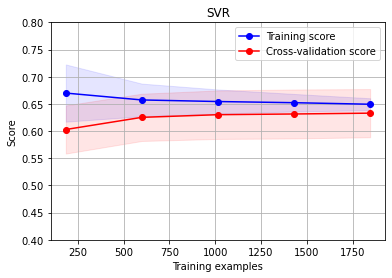

In [33]:
X = train_data.values
y = train_target.values

title = r"SVR"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 0)

estimator = SVR(kernel = "linear", C = 0.5)
plot_learning_curve(estimator, title, X, y, ylim = (0.4, 0.8), cv = cv, n_jobs = 1)

In [27]:
# Decision tree regression
clf = DecisionTreeRegressor() 
clf.fit(train_data, train_target)

score = mean_squared_error(test_target, clf.predict(test_data))
print("DecisionTreeRegressor:   ", score)

DecisionTreeRegressor:    0.6585497750865051


[1. 1. 1. 1. 1.]
[0.11061075 0.22929552 0.27889411 0.31191917 0.3286849 ]


<module 'matplotlib.pyplot' from 'C:\\Users\\Stille\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

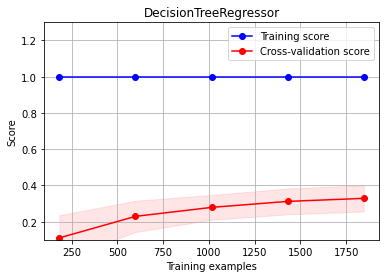

In [28]:
X = train_data.values
y = train_target.values

title = r"DecisionTreeRegressor"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 0)

estimator = DecisionTreeRegressor()
plot_learning_curve(estimator, title, X, y, ylim = (0., 1.3), cv = cv, n_jobs = 1)

In [29]:
# Random forest with 200 trees
clf = RandomForestRegressor(n_estimators = 200)
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("RandomForestRegressor:   ", score)

RandomForestRegressor:    0.2503809276553633


In [25]:
# Lgb
clf = lgb.LGBMRegressor(
        learning_rate = 0.01,
        max_depth = -1,
        n_estimators = 5000,
        boosting_type = 'gbdt',
        random_state = 2019,
        objective = 'regression',
    )

clf.fit(
        X = train_data, y = train_target,
        eval_metric = 'MSE',
        verbose = 50
    )

score = mean_squared_error(test_target, clf.predict(test_data))
print("lightGbm:  ", score)

lightGbm:    0.24304423745880807


[0.55639781 0.64440536 0.65548528 0.6477264  0.63699329]
[0.41974394 0.49877716 0.52304854 0.53049059 0.53361332]


<module 'matplotlib.pyplot' from 'C:\\Users\\Stille\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

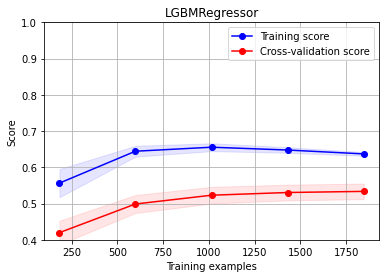

In [30]:
X = train_data.values
y = train_target.values
 
title = r"LGBMRegressor"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 0)

estimator = lgb.LGBMRegressor(
    learning_rate = 0.01,
    max_depth = -1,
    n_estimators = 100,
    boosting_type = 'gbdt',
    random_state = 2019,
    objective = 'regression'
    )

plot_learning_curve(estimator, title, X, y, ylim = (0.4, 1.0), cv = cv, n_jobs = 1)